# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells; please first answer with markdown and then with code.
3. You can split up your code answers into multiple cells if you like, but keep them in order for me to grade!
4. You have 90 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
6. Your final grade will be `score / 70 * 9 + 1`


In [ ]:
nx.Graph?

# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [24]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Question 1 (7pt)

1. What is the definition of a "cycle"?
2. Given a simple, undirected graph without self-loops, what is the size of the smallest cycle possible?
3. Given a simple, undirected graph *with* self-loops, what is the size of the smallest cycle possible?
4. Given a simple, directed graph without self-loops, what is the size of the smallest cycle possible?
5. Given a simple, undirected bipartite graph, what is the size of the smallest cycle possible?
6. Given a complete graph, what is the size of the smallest cycle?
7. Explain what the following means: $N(v) = {w \in V(G) | v \neq w, \exists e \in E(G) : e = (w, v)}$

### Text Markdown answers to question 1


In [25]:
## Code Answers to question 1
# 1. a cycle is a path thats starts and ends at the same vertex
# 2. you need 2 vertices to have the smallest cycle
# 3. you only need 1 vertex to have a cycle with a self loop
# 4. you need 3 vertices to have a cycles 
# 5. 
# 6. 
# 7. w and v are neighbours

## Question 2 (21pt)
A citation graph is a DiGraph consisting of papers as nodes, and citations as edges. An edge will point from paper A to paper B iff paper A cites paper B.

An author's h-index is defined as the maximum value of $h$ such that the given author/journal has published at least $h$ papers that have each been cited at least $h$ times.

1. Read in the DiGraph in the file `citation_graph.json`. It is in node-link format. Nodes represent papers. Each node (paper) has an `'AuthIds'` attribute, which is a list of that paper's authors. If you are unable to read in the graph, use the following bit of code:
```python
import pickle
with open('citation_graph.pickle', 'rb') as jar:
        citation_graph = pickle.load(jar) 
```
2. Is this DiGraph a DAG, and why should/shouldn't it be?
3. What is the most cited paper?
4. What is the most cited author?
3. Write a function that calculates the h-index for authors. Which author has the highest h-index?

### Text Markdown Answers to Question 2


In [34]:
## Code Answers to Question 2
##1
from networkx.readwrite import json_graph
with open("citation_graph(1).json", 'r') as file:
    graph = json.load(file)
graph = json_graph.node_link_graph(graph)
##2
print(nx.is_directed_acyclic_graph(graph))

##3
cited_papers = [v for v in graph.in_degree()]
most_citations = 0
papername = ''
for paper, indegree in cited_papers:
    if indegree > most_citations:
        papername = paper
        most_citations = indegree
print(papername, most_citations)

##4
authors = nx.get_node_attributes(graph, "AuthIds")
authors_list = [author for authors in authors.values() for author in authors]
authors_list
df = pd.DataFrame({'author':authors_list})
df.value_counts().head(2)
        

False
13DFA56F 309


author  
0.0         109
145F0C2D     79
dtype: int64

In [ ]:
##5Write a function that calculates the h-index for authors. Which author has the highest h-index?


## Question 3 (21pt)
For the book Les Miserable someone counted how often pairs of characters appeared in the same scene. This can of course be represented as a graph where nodes are characters, and there is an edge between 2 characters if they appear in the same scene. In addition, the edges can be weighted by how many scenes they share.

We'll investigate who the central characters in this story are. One measure you could use is the *betweenness centrality*. This is defined as follows:
> Let $G$ be a simple, connected graph. Let $S(x, y)$ be the set of shortest paths between two vertices $x, y \in V(G)$, and $S(x, u, y) \subseteq S(x,y)$ the ones that pass through node $u \in V(G)$. The *betweenness centrality* $c_B(u)$ of node $u$ is defined as: $$c_B(u) = \sum_{x \neq y} \frac{|S(x, u, y)|}{|S(x, y)|}$$

1. Explain in your own words what the betweenness centrality means.
2. What other measures, besides the betweenness centrality, could you use to find the main character(s)?
3. Load the graph in the file `les_miserables.graphml`. The file is in GraphML format. If you are unable to read in the file, use the following snippet of code: 
```python
graph = nx.les_miserables_graph()
```
4. Find the 5 most important characters. Use the betweenness centrality (use an existing implementation), and at least one other measure you can think of. Do your chosen metrics agree with eachother? Why (not)?

### Text Markdown Answers to Question 3


{'Napoleon': 0.30158730158730157,
 'Myriel': 0.4293785310734463,
 'MlleBaptistine': 0.41304347826086957,
 'MmeMagloire': 0.41304347826086957,
 'CountessDeLo': 0.30158730158730157,
 'Geborand': 0.30158730158730157,
 'Champtercier': 0.30158730158730157,
 'Cravatte': 0.30158730158730157,
 'Count': 0.30158730158730157,
 'OldMan': 0.30158730158730157,
 'Valjean': 0.6440677966101694,
 'Labarre': 0.39378238341968913,
 'Marguerite': 0.41304347826086957,
 'MmeDeR': 0.39378238341968913,
 'Isabeau': 0.39378238341968913,
 'Gervais': 0.39378238341968913,
 'Listolier': 0.34080717488789236,
 'Tholomyes': 0.3917525773195876,
 'Fameuil': 0.34080717488789236,
 'Blacheville': 0.34080717488789236,
 'Favourite': 0.34080717488789236,
 'Dahlia': 0.34080717488789236,
 'Zephine': 0.34080717488789236,
 'Fantine': 0.46060606060606063,
 'MmeThenardier': 0.46060606060606063,
 'Thenardier': 0.5170068027210885,
 'Cosette': 0.4779874213836478,
 'Javert': 0.5170068027210885,
 'Fauchelevent': 0.4021164021164021,
 'Bama

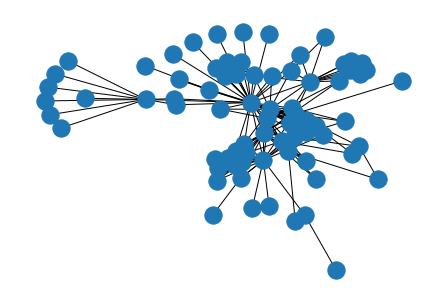

In [41]:
## Code answers to Question 3
## 1. the betweenness centrality is the shortest path between x and y while going through vertex u
## 2. you could also look for the closeness of a vertex compared to the other vertices in the graph
## 3. 
graph = nx.read_graphml("les_miserables(1).graphml")
nx.draw(graph)

##4 
betweenness_centrality = nx.betweenness_centrality(graph)
betweenness_centrality
close_centrality = nx.closeness_centrality(graph)
close_centrality
# they give simmilar results but they are different in values because betweenness centrality uses a vertex in between

## Question 4 (21pt)
Given a number of nodes you can create a random graph by randomly adding edges between those nodes. This is also known as an Erdős–Rényi random graph, or gnp graph. You can generate such a graph using the networkx function `nx.fast_gnp_random_graph`. 

We will investigate the following statement: Almost every graph in $G(n, \frac{2 ln(n)}{n})$ is connected, where $n$ is the number of nodes, and $\frac{2ln(n)}{n}$ the chance that any 2 nodes are connected.

1. What does it mean for a graph to be "connected"?
2. Take `n = 100` and `p = 0.02`. Generate the corresponding gnp graph. What is the size of largest connected component in that graph?
3. Given a fixed value for n (e.g. 100), plot the size of the largest connected component as a function of p. Do you find the given statement to be correct?

Hint: use something like `plt.plot(p_values, sizes)` to make the plot.

### Text Markdown Answers to Question 4


Graph with 100 nodes and 1018 edges


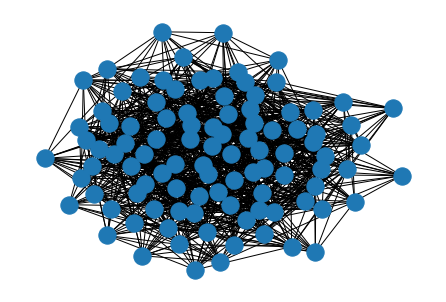

In [64]:
## Code answers to Question 4
# 1. there is a path from any vertex to any of the other vertices in the graph
# 2.
graph = nx.fast_gnp_random_graph(n=100, p=0.2)
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
G0 = graph.subgraph(Gcc[0])
print(G0)
nx.draw(G0)

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTExam_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!